
# 1.-Datos Covid con cluster

In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:

import pandas as pd
from sklearn import svm
from sklearn.model_selection import GridSearchCV
import os
import matplotlib.pyplot as plt
from skimage.transform import resize
from skimage.io import imread
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
import pickle


In [3]:
Categories=['Otras causas','COVID-19']
print("Type y to give categories or type n to go with classification of Cars,Ice Cream cone and Cricket ball");


Type y to give categories or type n to go with classification of Cars,Ice Cream cone and Cricket ball


Cargamos los datos

In [4]:
import random

# Establecer la semilla
random.seed(42)

In [5]:
import os
import numpy as np
from skimage.io import imread
from skimage.transform import resize

flat_data_arr = []
target_arr = []
image_names_arr = []  
# Por favor, utiliza datadir='/content' si los archivos se cargan en Google Colab
# De lo contrario, monta la unidad y proporciona la ruta del directorio principal que contiene todas las carpetas de imágenes de categoría.
datadir = r'C:\Users\andre\Desktop\images\carpeta_otras'

# Iterar sobre las categorías
for i in Categories:
    print(f'Cargando... categoría: {i}')
    path = os.path.join(datadir, i)
    images_in_category = os.listdir(path)
    # Seleccionar solo el 10% de las imágenes en la categoría actual
    num_images_to_select = int(1 * len(images_in_category))
    selected_images = np.random.choice(images_in_category, num_images_to_select, replace=False)

    for img in selected_images:
        img_array = imread(os.path.join(path, img))
        img_resized = resize(img_array, (60, 60, 3))
        flat_data_arr.append(img_resized)
        target_arr.append(Categories.index(i))
        image_names_arr.append(img)  # Guardar el nombre de la imagen
    print(f'Categoría cargada correctamente: {i}')

flat_data = np.array(flat_data_arr)
target = np.array(target_arr)



Cargando... categoría: Otras causas
Categoría cargada correctamente: Otras causas
Cargando... categoría: COVID-19
Categoría cargada correctamente: COVID-19


In [6]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [7]:
import numpy as np

# Calcula la media y la desviación estándar de flat_data
mean_value = np.mean(flat_data)
std_value = np.std(flat_data)

print("Media de los datos:", mean_value)
print("Desviación estándar de los datos:", std_value)


Media de los datos: 0.5506352710064991
Desviación estándar de los datos: 0.24699215374068786


In [8]:
max_value = np.max(flat_data)
min_value = np.min(flat_data)

In [9]:
print(max_value )
print(min_value )

1.0
0.0


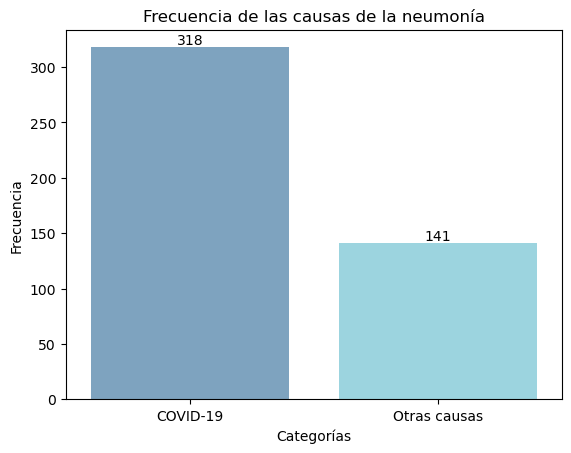

In [60]:
import seaborn as sns
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import pandas as pd

# Supongamos que 'target' es tu variable de destino
colores = ['#73A4CA', '#91DCEA', '#64CDCC', '#5FBB68', '#F9D23C', '#F9A729', '#FD6F30']

# Convert hexadecimal colors to RGBA
colores_rgba = [mcolors.to_rgba(color) if len(color) == 7 else mcolors.to_rgba(color + 'FF') for color in colores]

# Crear un DataFrame con los datos
df = pd.DataFrame(target, columns=['Labels'])

# Convertir 0 y 1 de 'target' a 'Otras causas' y 'COVID-19'
df['Labels'] = df['Labels'].replace({0: 'Otras causas', 1: 'COVID-19'})

# Contar las frecuencias y ordenar
order = df['Labels'].value_counts().index

# Gráfico de conteo con las categorías ordenadas
sx = sns.countplot(x='Labels', data=df, palette=colores_rgba, order=order)

# Añadir etiquetas a los ejes x e y
plt.xlabel('Categorías')
plt.ylabel('Frecuencia')

# Añadir título al gráfico
plt.title('Frecuencia de las causas de la neumonía')

# Añadir el número de conteo encima de cada barra
for p in sx.patches:
    sx.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points')

# Guardar el gráfico como imagen
plt.savefig('frecuencias.png')

# Mostrar el gráfico
plt.show()


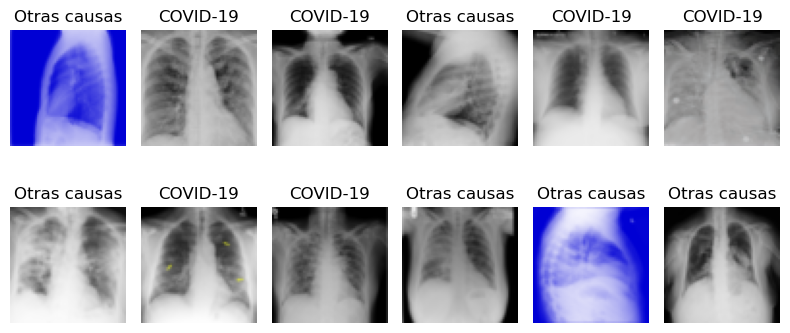

In [11]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))

rows = 2
cols = 6

for n, i in enumerate(list(np.random.randint(0, len(flat_data), rows * cols))):
    plt.subplot(rows, cols, n+1)
    plt.imshow(flat_data[i])
    plt.title(Categories[target[i]])
    plt.axis('off')

plt.tight_layout()
plt.savefig('malaria.png')
plt.show()



##  Unir csv e imágenes

Aplano las imágenes y las uno al nombre de la imágen

In [105]:
Data2 = []  # Asegúrate de que esta lista está creada antes de usarla

for img in flat_data:
    # Aplana la imagen y agrega la fila a la lista
    Data2.append(img.flatten())

# Convierte la lista de imágenes aplanadas a un array NumPy
Data2 =  pd.DataFrame(Data2)

In [106]:
df_image_names = pd.DataFrame(image_names_arr, columns=['filename'])
Data_final = pd.concat([Data2, df_image_names], axis=1)

In [107]:
Data_final

,0,1,2,3,4,5,6,7,8,9,...,10791,10792,10793,10794,10795,10796,10797,10798,10799,filename
0,0.076872,0.076872,0.846145,0.042956,0.042956,0.840493,0.042890,0.042890,0.840482,0.042387,...,0.042479,0.042479,0.840413,0.062361,0.062361,0.843727,0.290677,0.290677,0.881780,000001-17.jpg
1,0.253305,0.253305,0.253305,0.254942,0.254942,0.254942,0.280285,0.280285,0.280285,0.317555,...,0.835615,0.835615,0.835615,0.809860,0.809860,0.809860,0.781947,0.781947,0.781947,SARS-10.1148rg.242035193-g04mr34g09b-Fig9b-day...
2,0.450451,0.450451,0.450451,0.467925,0.467925,0.467925,0.448959,0.448959,0.448959,0.421084,...,0.250934,0.250934,0.250934,0.058093,0.058093,0.058093,0.002319,0.002319,0.002319,16646_1_1.jpg
3,0.062954,0.062954,0.062954,0.085345,0.085345,0.085345,0.107034,0.107034,0.107034,0.123677,...,0.665593,0.665593,0.665593,0.551942,0.551942,0.551942,0.408413,0.408413,0.408413,right-upper-lobe-pneumonia-9-PA.jpg
4,0.462698,0.462698,0.462698,0.440194,0.440194,0.440194,0.329539,0.329539,0.329539,0.155727,...,0.963592,0.963592,0.963592,0.955777,0.955777,0.955777,0.933219,0.933219,0.933219,SARS-10.1148rg.242035193-g04mr34g0-Fig8b-day5....
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454,0.096023,0.096023,0.096023,0.079426,0.079426,0.079426,0.082557,0.082557,0.082557,0.071413,...,0.563853,0.563853,0.563853,0.473544,0.473544,0.473544,0.341114,0.341114,0.341114,16744_1_1.jpg
455,0.303467,0.303467,0.303467,0.302955,0.302955,0.302955,0.305108,0.305108,0.305108,0.304468,...,0.177249,0.177249,0.177249,0.216401,0.216401,0.216401,0.515396,0.515396,0.515396,DE488FE1-0C44-428B-B67A-09741C1214C0.jpeg
456,0.720643,0.723322,0.708261,0.717676,0.720315,0.705380,0.718194,0.720851,0.705932,0.631854,...,0.304163,0.308092,0.318459,0.299417,0.303339,0.312855,0.310899,0.314821,0.324655,auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...
457,0.029836,0.029836,0.029836,0.056568,0.056568,0.056568,0.091766,0.091766,0.091766,0.128188,...,0.728204,0.728204,0.728204,0.693689,0.693689,0.693689,0.685084,0.685084,0.685084,A7E260CE-8A00-4C5F-A7F5-27336527A981.jpeg


In [108]:
import pandas as pd

# Ruta del archivo XLSX que contiene los nombres de las imágenes
archivo_imagenes_xlsx = "C:\\Users\\andre\\Desktop\\2º Cuatri\\TFG\\codigo\\final\\dfXY3.xlsx"

# Cargar el archivo XLSX
df_imagenes = pd.read_excel(archivo_imagenes_xlsx)
df_merged = pd.merge(Data_final, df_imagenes, on='filename', how='inner')

In [109]:
df_merged

,0,1,2,3,4,5,6,7,8,9,...,10793,10794,10795,10796,10797,10798,10799,filename,target,Cluster_asignado
0,0.076872,0.076872,0.846145,0.042956,0.042956,0.840493,0.042890,0.042890,0.840482,0.042387,...,0.840413,0.062361,0.062361,0.843727,0.290677,0.290677,0.881780,000001-17.jpg,1,1
1,0.253305,0.253305,0.253305,0.254942,0.254942,0.254942,0.280285,0.280285,0.280285,0.317555,...,0.835615,0.809860,0.809860,0.809860,0.781947,0.781947,0.781947,SARS-10.1148rg.242035193-g04mr34g09b-Fig9b-day...,1,1
2,0.450451,0.450451,0.450451,0.467925,0.467925,0.467925,0.448959,0.448959,0.448959,0.421084,...,0.250934,0.058093,0.058093,0.058093,0.002319,0.002319,0.002319,16646_1_1.jpg,1,1
3,0.062954,0.062954,0.062954,0.085345,0.085345,0.085345,0.107034,0.107034,0.107034,0.123677,...,0.665593,0.551942,0.551942,0.551942,0.408413,0.408413,0.408413,right-upper-lobe-pneumonia-9-PA.jpg,1,1
4,0.462698,0.462698,0.462698,0.440194,0.440194,0.440194,0.329539,0.329539,0.329539,0.155727,...,0.963592,0.955777,0.955777,0.955777,0.933219,0.933219,0.933219,SARS-10.1148rg.242035193-g04mr34g0-Fig8b-day5....,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454,0.096023,0.096023,0.096023,0.079426,0.079426,0.079426,0.082557,0.082557,0.082557,0.071413,...,0.563853,0.473544,0.473544,0.473544,0.341114,0.341114,0.341114,16744_1_1.jpg,0,1
455,0.303467,0.303467,0.303467,0.302955,0.302955,0.302955,0.305108,0.305108,0.305108,0.304468,...,0.177249,0.216401,0.216401,0.216401,0.515396,0.515396,0.515396,DE488FE1-0C44-428B-B67A-09741C1214C0.jpeg,0,0
456,0.720643,0.723322,0.708261,0.717676,0.720315,0.705380,0.718194,0.720851,0.705932,0.631854,...,0.318459,0.299417,0.303339,0.312855,0.310899,0.314821,0.324655,auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...,0,1
457,0.029836,0.029836,0.029836,0.056568,0.056568,0.056568,0.091766,0.091766,0.091766,0.128188,...,0.728204,0.693689,0.693689,0.693689,0.685084,0.685084,0.685084,A7E260CE-8A00-4C5F-A7F5-27336527A981.jpeg,0,1


In [110]:
num_filas, num_columnas = df_merged.shape

print("Número de filas:", num_filas)
print("Número de columnas:", num_columnas)

Número de filas: 459
Número de columnas: 10803


In [111]:
# Eliminar la columna 'filename' del DataFrame resultante
df_merged = df_merged.drop(columns=['filename'])

# Mostrar el DataFrame resultante sin la columna 'filename'
df_merged.head()


,0,1,2,3,4,5,6,7,8,9,...,10792,10793,10794,10795,10796,10797,10798,10799,target,Cluster_asignado
0,0.076872,0.076872,0.846145,0.042956,0.042956,0.840493,0.042890,0.042890,0.840482,0.042387,...,0.042479,0.840413,0.062361,0.062361,0.843727,0.290677,0.290677,0.881780,1,1
1,0.253305,0.253305,0.253305,0.254942,0.254942,0.254942,0.280285,0.280285,0.280285,0.317555,...,0.835615,0.835615,0.809860,0.809860,0.809860,0.781947,0.781947,0.781947,1,1
2,0.450451,0.450451,0.450451,0.467925,0.467925,0.467925,0.448959,0.448959,0.448959,0.421084,...,0.250934,0.250934,0.058093,0.058093,0.058093,0.002319,0.002319,0.002319,1,1
3,0.062954,0.062954,0.062954,0.085345,0.085345,0.085345,0.107034,0.107034,0.107034,0.123677,...,0.665593,0.665593,0.551942,0.551942,0.551942,0.408413,0.408413,0.408413,1,1
4,0.462698,0.462698,0.462698,0.440194,0.440194,0.440194,0.329539,0.329539,0.329539,0.155727,...,0.963592,0.963592,0.955777,0.955777,0.955777,0.933219,0.933219,0.933219,1,1


Divido el data set en clusters

In [112]:
# Paso 1: Agrupar por 'Cluster_asignado'
grupos = df_merged.groupby('Cluster_asignado')

# Diccionario para almacenar los conjuntos de datos de cada grupo
datos_por_cluster = {}

# Pasos 2 y 3: Para cada grupo, seleccionar las columnas de características y el objetivo
for nombre_grupo, datos_grupo in grupos:
    # Seleccionar solo las columnas de características (1 a 10799) y el objetivo (target)
    columnas_caracteristicas = datos_grupo.iloc[:, :10799]  # Seleccionar columnas de características
    objetivo = datos_grupo['target'] 

Divido en imagenes y target

In [113]:
# Dividir el DataFrame según la columna 'Cluster_asignado'
grupos = df_merged.groupby('Cluster_asignado')

# Paso 2: Crear un diccionario para almacenar los DataFrames de cada grupo
dataframes_por_cluster = {}

# Paso 3: Iterar sobre los grupos y almacenar cada uno en el diccionario
for nombre_grupo, datos_grupo in grupos:
    # Almacena el DataFrame del grupo en el diccionario
    dataframes_por_cluster[f'cluster{nombre_grupo}'] = datos_grupo.copy()

# Ahora tienes un diccionario donde cada clave es el nombre del cluster (por ejemplo, 'cluster1', 'cluster2')
# y cada valor es el DataFrame correspondiente.

In [114]:
# Acceder al DataFrame del cluster 0
cluster_0 = dataframes_por_cluster['cluster0']
cluster_1 = dataframes_por_cluster['cluster1']
#cluster_2 = dataframes_por_cluster['cluster2']
# Ahora puedes trabajar con el DataFrame 'cluster_0' como desees
print(cluster_0.head())  # Por ejemplo, mostrar las primeras filas del DataFrame


           0         1         2         3         4         5         6  \
5   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
6   0.015675  0.015675  0.835946  0.014760  0.014760  0.835793  0.011416   
7   0.016054  0.016054  0.836009  0.001578  0.001578  0.833596  0.000007   
11  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
12  0.070940  0.070940  0.845157  0.098679  0.098679  0.849780  0.117389   

           7         8         9  ...     10792     10793     10794     10795  \
5   0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.000000   
6   0.011416  0.835236  0.006543  ...  0.058054  0.843009  0.013053  0.013053   
7   0.000007  0.833334  0.000000  ...  0.012735  0.835456  0.013680  0.013680   
11  0.000000  0.000000  0.000000  ...  0.592592  0.592592  0.451476  0.451476   
12  0.117389  0.852898  0.117866  ...  0.170351  0.861725  0.055192  0.055192   

       10796     10797     10798     10799  target  Clus

In [115]:
# Extraer la columna 'target' del DataFrame del cluster 0
target_0 = cluster_0['target']
target_1 = cluster_1['target']
#target_2 = cluster_2['target']
# Mostrar el vector 'target_cluster_0'
print(target_1)


0      1
1      1
2      1
3      1
4      1
      ..
451    0
453    0
454    0
456    0
457    0
Name: target, Length: 251, dtype: int64


In [116]:
# Eliminar las columnas 'target' y 'Cluster_asignado' del DataFrame cluster_0
cluster_0 = cluster_0.drop(columns=['target', 'Cluster_asignado'])
cluster_1 = cluster_1.drop(columns=['target', 'Cluster_asignado'])
#cluster_2 = cluster_2.drop(columns=['target', 'Cluster_asignado'])
# Mostrar el DataFrame cluster_0_sin_target
print(cluster_1)


        0         1         2         3         4         5         6      \
0    0.076872  0.076872  0.846145  0.042956  0.042956  0.840493  0.042890   
1    0.253305  0.253305  0.253305  0.254942  0.254942  0.254942  0.280285   
2    0.450451  0.450451  0.450451  0.467925  0.467925  0.467925  0.448959   
3    0.062954  0.062954  0.062954  0.085345  0.085345  0.085345  0.107034   
4    0.462698  0.462698  0.462698  0.440194  0.440194  0.440194  0.329539   
..        ...       ...       ...       ...       ...       ...       ...   
451  0.107580  0.107580  0.107580  0.039226  0.039226  0.039226  0.054824   
453  0.003922  0.003922  0.003922  0.003922  0.003922  0.003922  0.003922   
454  0.096023  0.096023  0.096023  0.079426  0.079426  0.079426  0.082557   
456  0.720643  0.723322  0.708261  0.717676  0.720315  0.705380  0.718194   
457  0.029836  0.029836  0.029836  0.056568  0.056568  0.056568  0.091766   

        7         8         9      ...         10790     10791     10792  \

## 1.2.-Divido

In [117]:
import random

# Establecer la semilla
random.seed(42)

In [118]:
# División en datos de entrenamiento (70%) y datos restantes (30%)
trainX2,testX2, y_train, y_test = train_test_split(cluster_1, target_1, test_size=0.20, random_state=77, stratify=target_1)


print('Datos divididos con éxito.')

Datos divididos con éxito.


In [119]:
len(cluster_1)

251

In [120]:
print(len(y_test))
print(len(y_train))

51
200


# 4.- SVM lineal

In [131]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Supongamos que x1_train, y1_train son tus datos de entrenamiento

# Definir el espacio de búsqueda para los hiperparámetros del clasificador
param_grid = {
    'C': [0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
}
#0.0001,0.001,0.01, 0.1, 1
# Definir el clasificador (SVC) directamente sin pipeline
classifier = LinearSVC()
cv = KFold(n_splits=4, shuffle=True, random_state=42)
scoring = "f1"
# Crear un objeto GridSearchCV que realice el ajuste de hiperparámetros
grid_search = GridSearchCV(classifier, param_grid, cv=cv, scoring=scoring, n_jobs=-1)


In [132]:
grid_search.fit(trainX2, y_train)

C:\Users\andre\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


GridSearchCV(cv=KFold(n_splits=4, random_state=42, shuffle=True),
             estimator=LinearSVC(), n_jobs=-1,
             param_grid={'C': [1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1,
                               10, 100, 1000]},
             scoring='f1')

In [133]:
# Imprimir los mejores parámetros encontrados y el mejor score
print("Mejores Parámetros:", grid_search.best_params_)
print("Mejor Score F1:", round(grid_search.best_score_,3))

Mejores Parámetros: {'C': 10}
Mejor Score F1: 0.372


k=3 es 0.33

k=5  
Mejores Parámetros: {'C': 0.1}
Mejor Score F1: 0.32053306170953233
Los mejores hiperparámetros son: {'C': 0.1}
La puntuación de la validación cruzada es: 0.32



Mejores Parámetros: {'C': 1}
Mejor Score F1: 0.35

Mejores Parámetros: {'C': 10}
Mejor Score F1: 0.372

## 4.1.- Evaluo el modelo

In [134]:
from sklearn.metrics import f1_score

In [135]:
y_pred = best_model.predict(testX2)
# Calcula e imprime la precisión del modelo en el conjunto de prueba
print('Precisión en el conjunto de prueba:', f1_score(y_test, y_pred))
# Imprime el modelo entrenado
print("El mejor modelo encontrado fue:", best_model)

Precisión en el conjunto de prueba: 0.48
El mejor modelo encontrado fue: LinearSVC(C=0.1)


## 4.2.- Matriz de confusión

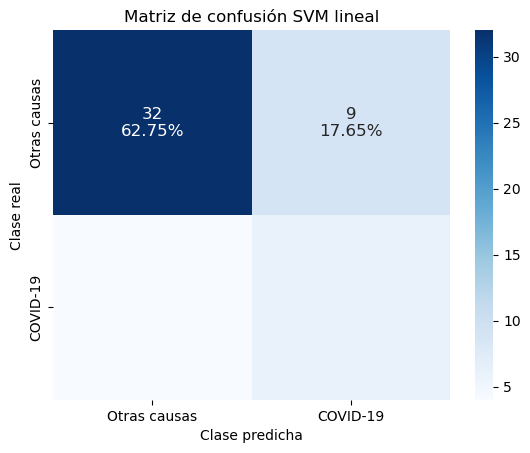

In [136]:
# Crear el DataFrame de la matriz de confusión
cf_matrix = confusion_matrix(y_test,y_pred)

group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
labels = np.asarray(labels).reshape(cf_matrix.shape[0], cf_matrix.shape[1])

# Crear el DataFrame de la matriz de confusión
Confusion_Matrix = pd.DataFrame(cf_matrix, index=Categories, columns=Categories)

# Graficar la matriz de confusión utilizando Seaborn
sns.heatmap(Confusion_Matrix, annot=labels, annot_kws={'size': 12}, fmt='', cmap='Blues')
plt.xlabel('Clase predicha')
plt.ylabel('Clase real')
plt.title('Matriz de confusión SVM lineal')
plt.show()


In [137]:
cf_matrix

array([[32,  9],
       [ 4,  6]], dtype=int64)

## 4.3.- Métricas

In [138]:
from sklearn import metrics

num_classes = 2

# Calcular la especificidad para cada clase
tn = cf_matrix[0, 0]
fp = cf_matrix[0, 1]  # Falsos positivos en la clase 0
specificity = tn / (tn + fp)


# Imprimir los resultados
print("Especificidad:\t{:.2f}".format(specificity))


Especificidad:	0.78


In [139]:
report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

           0       0.89      0.78      0.83        41
           1       0.40      0.60      0.48        10

    accuracy                           0.75        51
   macro avg       0.64      0.69      0.66        51
weighted avg       0.79      0.75      0.76        51



## 4.4.- Curva ROC

In [140]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc, roc_auc_score

y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
y_scores = best_model.decision_function(testX2)
n_classes=2


# Calcular la curva ROC y el área bajo la curva (AUC)
fpr, tpr, _ = roc_curve(y_test_bin, y_scores)
roc_auc = auc(fpr, tpr)


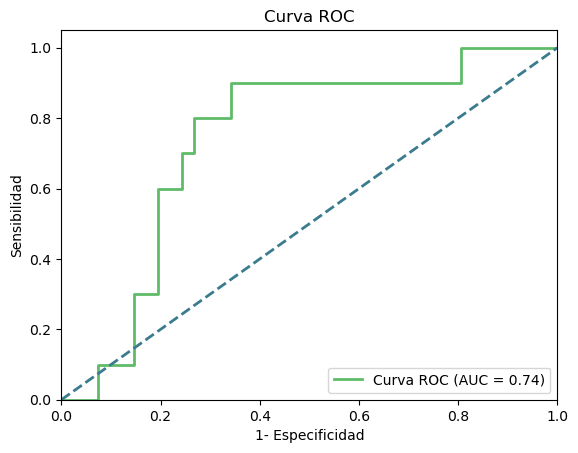

In [141]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc, roc_auc_score

y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
y_scores = best_model.decision_function(testX2)
n_classes=2


# Calcular la curva ROC y el área bajo la curva (AUC)
fpr, tpr, _ = roc_curve(y_test_bin, y_scores)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='#5FBB68', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='#3A7B8D', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1- Especificidad')
plt.ylabel('Sensibilidad')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.savefig('curva_roc2.png')
plt.show()


# 5.- SVM NO LINEAL: Kernel lineal, cuadrático y gausiano

In [142]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

## 5.1.- SVM Kernel lineal

In [43]:
param_grid_linear = [
    {
        "C":  [0.01, 0.1, 1, 10, 100],
        "kernel": ["linear"]
   }
]
#0.001,0.01, 0.1, 1,10

In [151]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.svm import SVC

# Definir métrica y mecanismos de evaluación interno
cv = KFold(n_splits=4, shuffle=True, random_state=42)
scoring = "f1"

# Crear un objeto GridSearchCV que realice el ajuste de hiperparámetros para cada modelo

# Modelo con kernel lineal
pipeline_linear = SVC()
grid_search_linear = GridSearchCV(pipeline_linear, param_grid_linear, cv=cv, scoring=scoring, n_jobs=-1)


In [152]:
grid_search_linear.fit(trainX2, y_train)

GridSearchCV(cv=KFold(n_splits=4, random_state=42, shuffle=True),
             estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [0.01, 0.1, 1, 10, 100], 'kernel': ['linear']}],
             scoring='f1')

In [153]:
best_score_linear = grid_search_linear.best_score_
best_params_linear = grid_search_linear.best_params_
best_model_linear = grid_search_linear.best_estimator_

In [154]:
print(f"El mejor F1-score obtenido en la validación interna fue: {best_score_linear:.3f}")
print(f"Los mejores valores de los otros hiperparámetros fueron: {best_params_linear}")
print(f"El mejor modelo fue: {best_model_linear}")

El mejor F1-score obtenido en la validación interna fue: 0.343
Los mejores valores de los otros hiperparámetros fueron: {'C': 1, 'kernel': 'linear'}
El mejor modelo fue: SVC(C=1, kernel='linear')


El mejor F1-score obtenido en la validación interna fue: 0.292
Los mejores valores de los otros hiperparámetros fueron: {'C': 1, 'kernel': 'linear'}
El mejor modelo fue: SVC(C=1, kernel='linear') k=3

El mejor F1-score obtenido en la validación interna fue: 0.343
Los mejores valores de los otros hiperparámetros fueron: {'C': 1, 'kernel': 'linear'}
El mejor modelo fue: SVC(C=1, kernel='linear') k=4

## 5.3.- Evaluación SVM lineal

In [155]:
# Usa el mejor modelo encontrado para hacer predicciones en el conjunto de prueba
y_pred_linear = best_model_linear.predict(testX2)

# Calcula e imprime la precisión del modelo en el conjunto de prueba
print('Precisión en el conjunto de prueba:', f1_score(y_test, y_pred_linear))
# Imprime el modelo entrenado
print("El mejor modelo encontrado fue:", best_model_linear)

Precisión en el conjunto de prueba: 0.48275862068965514
El mejor modelo encontrado fue: SVC(C=1, kernel='linear')


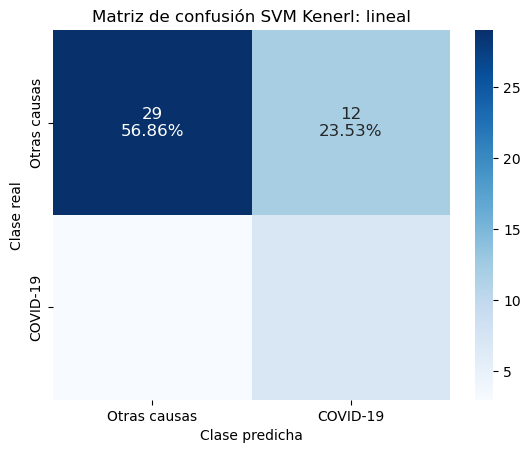

In [156]:
# Crear el DataFrame de la matriz de confusión
cf_matrix_linear = confusion_matrix(y_test,y_pred_linear)

group_counts = ["{0:0.0f}".format(value) for value in cf_matrix_linear.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix_linear.flatten()/np.sum(cf_matrix_linear)]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
labels = np.asarray(labels).reshape(cf_matrix_linear.shape[0], cf_matrix_linear.shape[1])

# Crear el DataFrame de la matriz de confusión
Confusion_Matrix_linear = pd.DataFrame(cf_matrix_linear, index=Categories, columns=Categories)

# Graficar la matriz de confusión utilizando Seaborn
sns.heatmap(Confusion_Matrix_linear, annot=labels, annot_kws={'size': 12}, fmt='', cmap='Blues')
plt.xlabel('Clase predicha')
plt.ylabel('Clase real')
plt.title('Matriz de confusión SVM Kenerl: lineal')
plt.show()


In [157]:
cf_matrix_linear

array([[29, 12],
       [ 3,  7]], dtype=int64)

In [158]:

# Definir el número de clases
num_classes = 2

# Calcular la especificidad para cada clase
tn = cf_matrix[0, 0]
fp = cf_matrix[0, 1]  # Falsos positivos en la clase 0
specificity = tn / (tn + fp)

# Imprimir los resultados
print("Especificidad:\t{:.2f}".format(specificity))
  


Especificidad:	0.78


In [159]:
report = classification_report(y_test, y_pred_linear,zero_division=0)
print(report)

              precision    recall  f1-score   support

           0       0.91      0.71      0.79        41
           1       0.37      0.70      0.48        10

    accuracy                           0.71        51
   macro avg       0.64      0.70      0.64        51
weighted avg       0.80      0.71      0.73        51



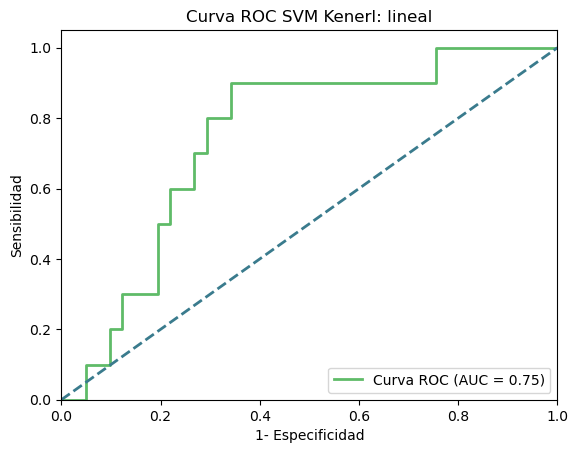

In [160]:
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
y_scores1 = best_model_linear.decision_function(testX2)
n_classes=2

# Calcular la curva ROC y el área bajo la curva (AUC)
fpr1, tpr1, _ = roc_curve(y_test_bin, y_scores1)
roc_auc1 = auc(fpr1, tpr1)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr1, tpr1, color='#5FBB68', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc1)
plt.plot([0, 1], [0, 1], color='#3A7B8D', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1- Especificidad')
plt.ylabel('Sensibilidad')
plt.title('Curva ROC SVM Kenerl: lineal')
plt.legend(loc="lower right")
plt.savefig('curva_roc3.png')
plt.show()


## 5.2.- SVM poly

In [161]:
param_grid_poly = [
    {
        "C":  [0.1, 1, 10, 100,1000],
        "kernel": ["poly"],
        "degree": [2],
        "coef0": np.linspace(0, 1, 10)
    }
]
#0.01, 0.1, 1, 10, 100

In [162]:
pipeline_poly = SVC()
grid_search_poly = GridSearchCV(pipeline_poly, param_grid_poly, cv=cv, scoring=scoring, n_jobs=-1)

In [163]:
grid_search_poly.fit(trainX2, y_train)

GridSearchCV(cv=KFold(n_splits=4, random_state=42, shuffle=True),
             estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [0.1, 1, 10, 100, 1000],
                          'coef0': array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]),
                          'degree': [2], 'kernel': ['poly']}],
             scoring='f1')

In [164]:
best_score_poly = grid_search_poly.best_score_
best_params_poly = grid_search_poly.best_params_
best_model_poly = grid_search_poly.best_estimator_

In [165]:
print(f"El mejor F1-score obtenido en la validación interna fue: {best_score_poly:.3f}")
print(f"Los mejores valores de los otros hiperparámetros fueron: {best_params_poly}")
print(f"El mejor modelo fue: {best_model_poly}")

El mejor F1-score obtenido en la validación interna fue: 0.316
Los mejores valores de los otros hiperparámetros fueron: {'C': 10, 'coef0': 0.5555555555555556, 'degree': 2, 'kernel': 'poly'}
El mejor modelo fue: SVC(C=10, coef0=0.5555555555555556, degree=2, kernel='poly')


El mejor F1-score obtenido en la validación interna fue: 0.308
Los mejores valores de los otros hiperparámetros fueron: {'C': 10, 'coef0': 0.7777777777777777, 'degree': 2, 'kernel': 'poly'}
El mejor modelo fue: SVC(C=10, coef0=0.7777777777777777, degree=2, kernel='poly')

El mejor F1-score obtenido en la validación interna fue: 0.316
Los mejores valores de los otros hiperparámetros fueron: {'C': 10, 'coef0': 0.5555555555555556, 'degree': 2, 'kernel': 'poly'}
El mejor modelo fue: SVC(C=10, coef0=0.5555555555555556, degree=2, kernel='poly')

### 5.2.1.- Evaluación SVM POLY

In [166]:
# Usa el mejor modelo encontrado para hacer predicciones en el conjunto de prueba
y_pred_poly = best_model_poly.predict(testX2)

# Calcula e imprime la precisión del modelo en el conjunto de prueba
print('Precisión en el conjunto de prueba:', f1_score(y_test, y_pred_poly))
# Imprime el modelo entrenado
print("El mejor modelo encontrado fue:", best_model_poly)

Precisión en el conjunto de prueba: 0.5384615384615384
El mejor modelo encontrado fue: SVC(C=10, coef0=0.5555555555555556, degree=2, kernel='poly')


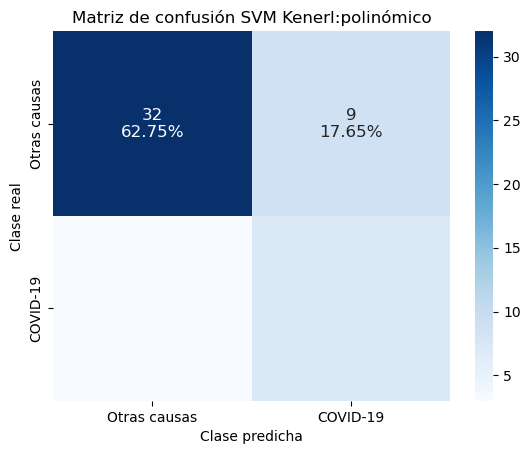

In [167]:
# Crear el DataFrame de la matriz de confusión
cf_matrix2 = confusion_matrix(y_test,y_pred_poly)

group_counts = ["{0:0.0f}".format(value) for value in cf_matrix2.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix2.flatten()/np.sum(cf_matrix2)]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
labels = np.asarray(labels).reshape(cf_matrix2.shape[0], cf_matrix2.shape[1])

# Crear el DataFrame de la matriz de confusión
Confusion_Matrix = pd.DataFrame(cf_matrix2, index=Categories, columns=Categories)

# Graficar la matriz de confusión utilizando Seaborn
sns.heatmap(Confusion_Matrix, annot=labels, annot_kws={'size': 12}, fmt='', cmap='Blues')
plt.xlabel('Clase predicha')
plt.ylabel('Clase real')
plt.title('Matriz de confusión SVM Kenerl:polinómico')
plt.show()


In [168]:
cf_matrix2

array([[32,  9],
       [ 3,  7]], dtype=int64)

In [169]:
from sklearn import metrics

# Supongamos que ya tenemos la matriz de confusión (cf_matrix), Y_test y Y_test_pred definidas previamente

# Definir el número de clases
num_classes = 2
# Calcular la especificidad para cada clase
tn2 = cf_matrix2[0, 0]
fp2 = cf_matrix2[0, 1]  # Falsos positivos en la clase 0
specificity = tn2 / (tn2 + fp2)

# Imprimir los resultados
print("Especificidad:\t{:.2f}".format(specificity))


Especificidad:	0.78


In [170]:
report = classification_report(y_test, y_pred_poly,zero_division=0)
print(report)

              precision    recall  f1-score   support

           0       0.91      0.78      0.84        41
           1       0.44      0.70      0.54        10

    accuracy                           0.76        51
   macro avg       0.68      0.74      0.69        51
weighted avg       0.82      0.76      0.78        51



### 5.2.2.-Curva ROC POLY

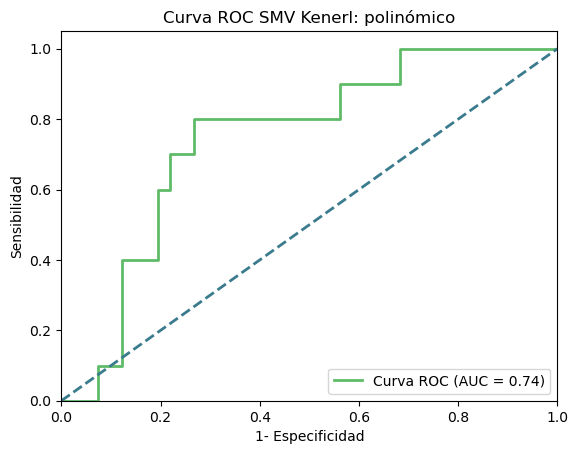

In [171]:

y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
y_scores2 = best_model_poly.decision_function(testX2)
n_classes=2


# Calcular la curva ROC y el área bajo la curva (AUC)
fpr2, tpr2, _ = roc_curve(y_test_bin, y_scores2)
roc_auc2 = auc(fpr2, tpr2)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr2, tpr2, color='#5FBB68', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc2)
plt.plot([0, 1], [0, 1], color='#3A7B8D', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1- Especificidad')
plt.ylabel('Sensibilidad')
plt.title('Curva ROC SMV Kenerl: polinómico')
plt.legend(loc="lower right")
plt.savefig('curva_roc4.png')
plt.show()

## 5.3.- SVM RBF

In [80]:
param_grid_rbf = [
       {
        "C":  [0.0000001,0.000001,0.00001,0.0001,0.001],
        "kernel": ["rbf"],
        "gamma": np.logspace(-2, 2, 10)
    }
]
#0.1, 1, 10, 100,1000

In [176]:
param_grid_rbf = [
    {
        "C": [10, 100, 1000,10000,100000],
        "gamma": np.logspace(-4, 2, 10),
        "kernel": ["rbf"]
    }
]

In [177]:
pipeline_rbf = SVC()
grid_search_rbf = GridSearchCV(pipeline_rbf, param_grid_rbf, cv=cv, scoring=scoring, n_jobs=-1)
grid_search_rbf.fit(trainX2, y_train)


GridSearchCV(cv=KFold(n_splits=4, random_state=42, shuffle=True),
             estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [10, 100, 1000, 10000, 100000],
                          'gamma': array([1.00000000e-04, 4.64158883e-04, 2.15443469e-03, 1.00000000e-02,
       4.64158883e-02, 2.15443469e-01, 1.00000000e+00, 4.64158883e+00,
       2.15443469e+01, 1.00000000e+02]),
                          'kernel': ['rbf']}],
             scoring='f1')

In [178]:
best_score_rbf = grid_search_rbf.best_score_
best_params_rbf = grid_search_rbf.best_params_
best_model_rbf = grid_search_rbf.best_estimator_

In [179]:
print(f"El mejor F1-score obtenido en la validación interna fue: {best_score_rbf:.3f}")
print(f"Los mejores valores de los otros hiperparámetros fueron: {best_params_rbf}")
print(f"El mejor modelo fue: {best_model_rbf}")

El mejor F1-score obtenido en la validación interna fue: 0.349
Los mejores valores de los otros hiperparámetros fueron: {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
El mejor modelo fue: SVC(C=1000, gamma=0.0001)


El mejor F1-score obtenido en la validación interna fue: 0.349
Los mejores valores de los otros hiperparámetros fueron: {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
El mejor modelo fue: SVC(C=1000, gamma=0.0001) k=4

El mejor F1-score obtenido en la validación interna fue: 0.376
Los mejores valores de los otros hiperparámetros fueron: {'C': 10, 'gamma': 0.002154434690031882, 'kernel': 'rbf'}
El mejor modelo fue: SVC(C=10, gamma=0.002154434690031882)

El mejor F1-score obtenido en la validación interna fue: 0.000
Los mejores valores de los otros hiperparámetros fueron: {'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}
El mejor modelo fue: SVC(C=0.01, gamma=0.01)

El mejor F1-score obtenido en la validación interna fue: 0.000
Los mejores valores de los otros hiperparámetros fueron: {'C': 0.0001, 'gamma': 0.01, 'kernel': 'rbf'}
El mejor modelo fue: SVC(C=0.0001, gamma=0.01)

### 5.3.1.- Evaluación SVM RBF

In [180]:
# Usa el mejor modelo encontrado para hacer predicciones en el conjunto de prueba
y_pred_rbf = best_model_rbf.predict(testX2)

# Calcula e imprime la precisión del modelo en el conjunto de prueba
print('Precisión en el conjunto de test:', f1_score(y_test, y_pred_rbf))
# Imprime el modelo entrenado
print("El mejor modelo encontrado fue:", best_model_rbf)

Precisión en el conjunto de test: 0.4347826086956522
El mejor modelo encontrado fue: SVC(C=1000, gamma=0.0001)


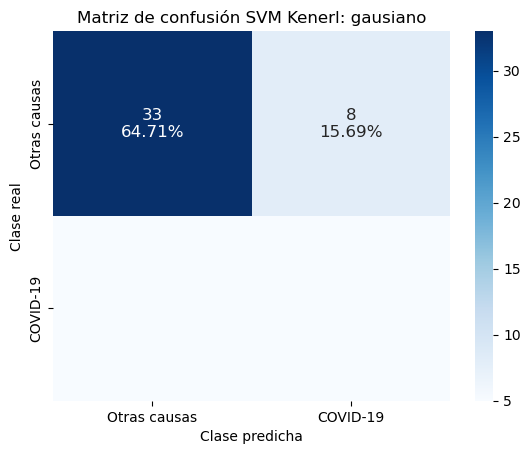

In [181]:
# Crear el DataFrame de la matriz de confusión
cf_matrix3 = confusion_matrix(y_test,y_pred_rbf)

group_counts = ["{0:0.0f}".format(value) for value in cf_matrix3.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix3.flatten()/np.sum(cf_matrix3)]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
labels = np.asarray(labels).reshape(cf_matrix3.shape[0], cf_matrix3.shape[1])

# Crear el DataFrame de la matriz de confusión
Confusion_Matrix = pd.DataFrame(cf_matrix3, index=Categories, columns=Categories)

# Graficar la matriz de confusión utilizando Seaborn
sns.heatmap(Confusion_Matrix, annot=labels, annot_kws={'size': 12}, fmt='', cmap='Blues')
plt.xlabel('Clase predicha')
plt.ylabel('Clase real')
plt.title('Matriz de confusión SVM Kenerl: gausiano')
plt.show()

In [182]:
cf_matrix3

array([[33,  8],
       [ 5,  5]], dtype=int64)

In [183]:
report = classification_report(y_test, y_pred_rbf, zero_division=0)
print(report)

              precision    recall  f1-score   support

           0       0.87      0.80      0.84        41
           1       0.38      0.50      0.43        10

    accuracy                           0.75        51
   macro avg       0.63      0.65      0.64        51
weighted avg       0.77      0.75      0.76        51



In [184]:
# Definir el número de clases
num_classes = 2

# Calcular la especificidad para cada clase
tn3 = cf_matrix3[0, 0]
fp3 = cf_matrix3[0, 1]  # Falsos positivos en la clase 0
specificity = tn3 / (tn3 + fp3)


# Imprimir los resultados
print("Especificidad:\t{:.2f}".format(specificity))
   


Especificidad:	0.80


### 5.3.2.- Curva ROC RBF

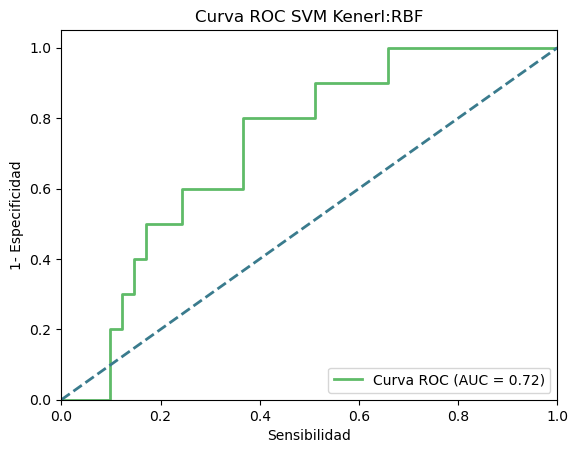

In [185]:
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
y_scores3 = best_model_rbf.decision_function(testX2)


# Calcular la curva ROC y el área bajo la curva (AUC)
fpr3, tpr3, _ = roc_curve(y_test_bin, y_scores3)
roc_auc3 = auc(fpr3, tpr3)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr3, tpr3, color='#5FBB68', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc3)
plt.plot([0, 1], [0, 1], color='#3A7B8D', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Sensibilidad')
plt.ylabel('1- Especificidad')
plt.title('Curva ROC SVM Kenerl:RBF')
plt.legend(loc="lower right")
plt.savefig('curva_roc5.png')
plt.show()

# 6.- Conclusiones

## 6.1.- Conclusión SVM no lineal

Resultados datos de entrenamiento

In [186]:
# Crear un catálogo para almacenar los mejores puntajes y parámetros de cada modelo
best_results = {
    "Modelo Lineal": {
        "best_score": best_score_linear,
        "best_params": best_params_linear
    },
    "Modelo Polinomial": {
        "best_score": best_score_poly,
        "best_params": best_params_poly
    },
    "Modelo RBF": {
        "best_score": best_score_rbf,
        "best_params": best_params_rbf
    }
}

# Imprimir el catálogo de mejores resultados para cada modelo
for modelo, resultados in best_results.items():
    print(f"Modelo: {modelo}")
    print(f"Mejor Puntaje: {resultados['best_score']:.3f}")
    print(f"Mejores Parámetros: {resultados['best_params']}")
    print()


Modelo: Modelo Lineal
Mejor Puntaje: 0.343
Mejores Parámetros: {'C': 1, 'kernel': 'linear'}

Modelo: Modelo Polinomial
Mejor Puntaje: 0.316
Mejores Parámetros: {'C': 10, 'coef0': 0.5555555555555556, 'degree': 2, 'kernel': 'poly'}

Modelo: Modelo RBF
Mejor Puntaje: 0.349
Mejores Parámetros: {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}



Resultados datos de test

In [187]:
print('F1 en el conjunto de prueba linear:', round(f1_score(y_test, y_pred_linear), 4))
print('F1 en el conjunto de prueba poly:', round(f1_score(y_test, y_pred_poly), 4))
print('F1 en el conjunto de prueba rbf:', round(f1_score(y_test, y_pred_rbf), 4))

F1 en el conjunto de prueba linear: 0.4828
F1 en el conjunto de prueba poly: 0.5385
F1 en el conjunto de prueba rbf: 0.4348


In [188]:
# Imprimir el AUC para cada modelo
print("AUC para el modelo lineal:", round(roc_auc1, 4))
print("AUC para el modelo polinomial:", round(roc_auc2, 4))
print("AUC para el modelo RBF:", round(roc_auc3, 4))

AUC para el modelo lineal: 0.7463
AUC para el modelo polinomial: 0.7439
AUC para el modelo RBF: 0.722


## 6.2.- Comparar SVM lineal vs SVM no lineal kernel lineal

Resultados datos de entrenamiento

In [189]:
print("Mejores Parámetros:", grid_search.best_params_)
print("Mejor Score F1:", grid_search.best_score_)

Mejores Parámetros: {'C': 10}
Mejor Score F1: 0.37192307692307697


Resultados datos de test

In [190]:
print('Precisión en el conjunto de prueba SVM lineal:', round(f1_score(y_test, y_pred),4))

Precisión en el conjunto de prueba SVM lineal: 0.48


In [191]:
print("AUC para el modelo SVM lineal:", round(roc_auc, 4))

AUC para el modelo SVM lineal: 0.739


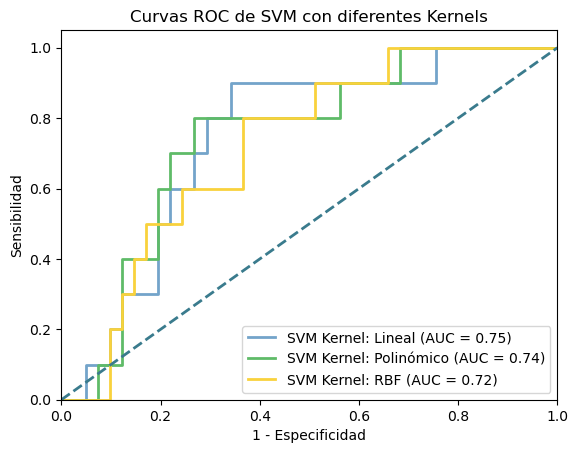

In [192]:
import matplotlib.pyplot as plt

# Crear una figura y ejes para los gráficos
fig, ax = plt.subplots()

# Trazar la primera curva ROC
ax.plot(fpr1, tpr1, color='#73A4CA', lw=2, label='SVM Kernel: Lineal (AUC = %0.2f)' % roc_auc1)

# Trazar la segunda curva ROC
ax.plot(fpr2, tpr2, color='#5FBB68', lw=2, label='SVM Kernel: Polinómico (AUC = %0.2f)' % roc_auc2)

# Trazar la tercera curva ROC
ax.plot(fpr3, tpr3, color='#F9D23C', lw=2, label='SVM Kernel: RBF (AUC = %0.2f)' % roc_auc3)

# Agregar la línea de referencia 45 grados
ax.plot([0, 1], [0, 1], color='#3A7B8D', lw=2, linestyle='--')

# Configurar los ejes y etiquetas
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('1 - Especificidad')
ax.set_ylabel('Sensibilidad')
ax.set_title('Curvas ROC de SVM con diferentes Kernels')
ax.legend(loc="lower right")

# Guardar la figura como imagen
plt.savefig('curvas_roc.png')

# Mostrar la figura
plt.show()


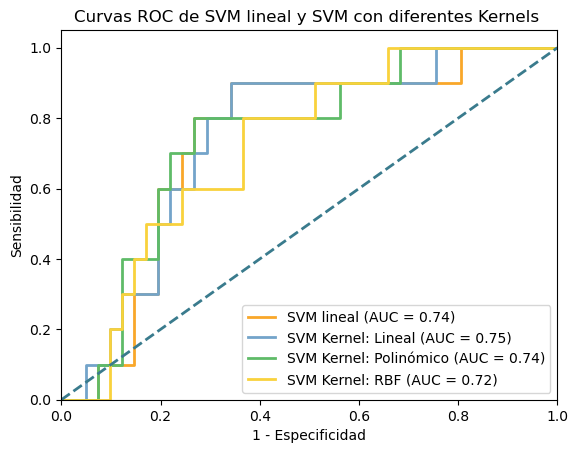

In [194]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# Crear una figura y ejes para los gráficos
fig, ax = plt.subplots()

# Trazar las curvas ROC de los diferentes kernels SVM
ax.plot(fpr, tpr, color='#F9A729', lw=2, label='SVM lineal (AUC = %0.2f)' % roc_auc)
ax.plot(fpr1, tpr1, color='#73A4CA', lw=2, label='SVM Kernel: Lineal (AUC = %0.2f)' % roc_auc1)
ax.plot(fpr2, tpr2, color='#5FBB68', lw=2, label='SVM Kernel: Polinómico (AUC = %0.2f)' % roc_auc2)
ax.plot(fpr3, tpr3, color='#F9D23C', lw=2, label='SVM Kernel: RBF (AUC = %0.2f)' % roc_auc3)

# Trazar la curva ROC del modelo específico


# Agregar la línea de referencia 45 grados
ax.plot([0, 1], [0, 1], color='#3A7B8D', lw=2, linestyle='--')

# Configurar los ejes y etiquetas
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('1 - Especificidad')
ax.set_ylabel('Sensibilidad')
ax.set_title('Curvas ROC de SVM lineal y SVM con diferentes Kernels ')
ax.legend(loc="lower right")

# Guardar la figura como imagen
plt.savefig('curvas_roc.png')

# Mostrar la figura
plt.show()

